# Data Loading & Overview

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import os


df = pd.read_csv("C:/Users/Saisa/Downloads/Walmart_Sales/data/processed/feature_engineered_sales.csv", parse_dates=['date'])
df.head()


,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,...,sales_roll_13,sales_roll_26,sales_roll_52,cumulative_sales,sales_diff_1,sales_diff_4,avg_sales_per_store,promo_last_week,promo_next_week,store_encoded
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,...,0.0,0.0,0.0,1643690.90,0.00,0.00,1.601845e+06,0.0,0.0,0
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,...,0.0,0.0,0.0,3285648.34,-1733.46,0.00,1.601845e+06,0.0,0.0,0
2,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,...,0.0,0.0,0.0,4840455.02,-87150.76,0.00,1.601845e+06,0.0,0.0,0
3,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,2010,12,...,0.0,0.0,0.0,6279996.61,-115265.09,0.00,1.601845e+06,0.0,0.0,0
4,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,2010,2,...,0.0,0.0,0.0,7874964.89,155426.69,-48722.62,1.601845e+06,0.0,0.0,0


In [5]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565 entries, 0 to 2564
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   store                2565 non-null   int64         
 1   date                 2565 non-null   datetime64[ns]
 2   weekly_sales         2565 non-null   float64       
 3   holiday_flag         2565 non-null   int64         
 4   temperature          2565 non-null   float64       
 5   fuel_price           2565 non-null   float64       
 6   cpi                  2565 non-null   float64       
 7   unemployment         2565 non-null   float64       
 8   year                 2565 non-null   int64         
 9   month                2565 non-null   int64         
 10  day                  2565 non-null   int64         
 11  weekday              2565 non-null   int64         
 12  is_weekend           2565 non-null   bool          
 13  is_holiday           2565 non-nul

store                     0
date                      0
weekly_sales              0
holiday_flag              0
temperature               0
fuel_price                0
cpi                       0
unemployment              0
year                      0
month                     0
day                       0
weekday                   0
is_weekend                0
is_holiday                0
holiday_name           2385
store_name                0
lag_1                     0
lag_2                     0
lag_4                     0
lag_13                    0
lag_26                    0
lag_52                    0
sales_roll_4              0
sales_roll_13             0
sales_roll_26             0
sales_roll_52             0
cumulative_sales          0
sales_diff_1              0
sales_diff_4              0
avg_sales_per_store       0
promo_last_week           0
promo_next_week           0
store_encoded             0
dtype: int64

# Numerical Analysis

In [6]:
df.describe().T


,count,mean,min,25%,50%,75%,max,std
store,2565.0,23.0,1.0,12.0,23.0,34.0,45.0,12.989706
date,2565,2011-05-29 11:47:22.105263104,2010-01-10 00:00:00,2010-10-09 00:00:00,2011-05-08 00:00:00,2012-02-03 00:00:00,2012-12-10 00:00:00,NaN
weekly_sales,2565.0,1059871.952441,209986.25,570069.48,981345.2,1450733.29,2752122.08,557383.102302
holiday_flag,2565.0,0.105263,0.0,0.0,0.0,0.0,1.0,0.306952
temperature,2565.0,59.585864,-2.06,45.26,61.1,74.57,100.07,19.069276
fuel_price,2565.0,3.329579,2.513,2.868,3.417,3.702,4.468,0.461985
cpi,2565.0,171.386349,126.085452,131.586613,182.598306,212.512605,227.169392,39.293112
unemployment,2565.0,8.022267,3.879,6.908,7.907,8.622,14.313,1.878158
year,2565.0,2010.929825,2010.0,2010.0,2011.0,2012.0,2012.0,0.791769
month,2565.0,6.561404,1.0,4.0,6.0,10.0,12.0,3.459797


## Skewness

In [7]:
df.select_dtypes(include='number').skew().sort_values(ascending=False)


lag_52                 4.175292
sales_roll_52          4.068930
promo_last_week        3.367303
promo_next_week        3.367303
is_holiday             3.367303
holiday_flag           2.573984
unemployment           1.202300
cumulative_sales       1.152616
lag_26                 0.892828
sales_roll_26          0.853635
weekly_sales           0.487995
lag_13                 0.441819
lag_1                  0.434440
avg_sales_per_store    0.424673
lag_2                  0.396562
sales_roll_13          0.396422
lag_4                  0.355740
sales_roll_4           0.314213
sales_diff_4           0.233120
year                   0.125252
day                    0.064478
cpi                    0.063058
month                  0.015787
store_encoded          0.000000
store                  0.000000
weekday               -0.032131
fuel_price            -0.071055
temperature           -0.260733
sales_diff_1          -1.370188
dtype: float64

In [10]:
import numpy as np

# Apply log1p where appropriate
df['lag_52'] = np.log1p(df['lag_52'])
df['sales_roll_52'] = np.log1p(df['sales_roll_52'])

# For positively skewed difference
df['sales_diff_1'] = np.log1p(df['sales_diff_1'])

# For negatively skewed variable (only if values ≤ 0)
if (df['cumulative_sales'] <= 0).all():
    df['cumulative_sales'] = -np.log1p(-df['cumulative_sales'])
else:
    # Else, apply Min-Max Scaling instead
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    df['cumulative_sales'] = scaler.fit_transform(df[['cumulative_sales']])


In [11]:
import numpy as np

# Fix right-skewed continuous features
df['lag_52'] = np.log1p(df['lag_52'])
df['sales_roll_52'] = np.log1p(df['sales_roll_52'])

# Fix left-skewed if all values are ≤ 0 (check this!)
if (df['cumulative_sales'] <= 0).all():
    df['cumulative_sales'] = -np.log1p(-df['cumulative_sales'])


In [12]:
df.select_dtypes(include='number').skew().sort_values(ascending=False)


is_holiday             3.367303
promo_next_week        3.367303
promo_last_week        3.367303
lag_52                 2.916710
sales_roll_52          2.916702
holiday_flag           2.573984
unemployment           1.202300
cumulative_sales       1.152616
lag_26                 0.892828
sales_roll_26          0.853635
weekly_sales           0.487995
lag_13                 0.441819
lag_1                  0.434440
avg_sales_per_store    0.424673
lag_2                  0.396562
sales_roll_13          0.396422
lag_4                  0.355740
sales_roll_4           0.314213
sales_diff_4           0.233120
year                   0.125252
day                    0.064478
cpi                    0.063058
month                  0.015787
store_encoded          0.000000
store                  0.000000
weekday               -0.032131
fuel_price            -0.071055
temperature           -0.260733
sales_diff_1          -4.966483
dtype: float64

## Kurtosis

In [13]:
df.select_dtypes(include='number').kurtosis().sort_values(ascending=False)


sales_diff_1           23.423986
promo_last_week         9.346018
promo_next_week         9.346018
is_holiday              9.346018
lag_52                  6.512718
sales_roll_52           6.512651
holiday_flag            4.629004
sales_diff_4            4.335384
unemployment            2.667348
cumulative_sales        0.862153
lag_26                 -0.353052
sales_roll_26          -0.496740
lag_4                  -0.690018
lag_2                  -0.691124
lag_1                  -0.707295
temperature            -0.732725
weekly_sales           -0.742206
lag_13                 -0.782694
sales_roll_4           -0.783067
sales_roll_13          -0.893264
avg_sales_per_store    -0.921266
day                    -1.176090
store                  -1.201188
store_encoded          -1.201188
fuel_price             -1.204003
month                  -1.254100
weekday                -1.327207
year                   -1.394888
cpi                    -1.841544
dtype: float64

In [14]:
columns_to_transform = ['lag_52', 'sales_roll_52', 'sales_diff_1']

comparison = pd.DataFrame(index=columns_to_transform)
comparison['Original Kurtosis'] = df[columns_to_transform].kurtosis().values
comparison['Transformed Kurtosis'] = df[[col + '_log' for col in columns_to_transform]].kurtosis().values

print(comparison)


KeyError: "None of [Index(['lag_52_log', 'sales_roll_52_log', 'sales_diff_1_log'], dtype='object')] are in the [columns]"

In [15]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix['weekly_sales'].sort_values(ascending=False)


weekly_sales           1.000000
avg_sales_per_store    0.983194
lag_1                  0.935316
lag_2                  0.895430
sales_roll_4           0.844075
lag_4                  0.835336
cumulative_sales       0.627231
sales_roll_13          0.624540
lag_13                 0.617345
sales_roll_26          0.455408
lag_26                 0.447603
sales_diff_4           0.101433
sales_diff_1           0.062745
promo_last_week        0.029125
fuel_price             0.027651
day                    0.023154
month                  0.004993
is_holiday             0.002970
year                   0.001727
holiday_flag           0.000557
promo_next_week       -0.001121
lag_52                -0.002256
sales_roll_52         -0.002259
is_weekend            -0.010025
weekday               -0.024490
temperature           -0.034620
cpi                   -0.077785
unemployment          -0.099208
store                 -0.343343
store_encoded         -0.343343
Name: weekly_sales, dtype: float64

In [16]:
from scipy.stats import zscore
import numpy as np
import pandas as pd

# Drop unwanted columns safely
drop_cols = [col for col in ['store', 'dept'] if col in df.columns]

# Select numeric features excluding dropped ones
df_z = df.select_dtypes(include='number').drop(columns=drop_cols)

# Calculate Z-scores
z_scores = np.abs(zscore(df_z))

# Count outliers (Z > 3) and convert to Series with column names
outliers = pd.Series((z_scores > 3).sum(axis=0), index=df_z.columns).sort_values(ascending=False)

# Display
print(outliers)


sales_roll_52          225
lag_52                 225
is_holiday             180
promo_last_week        180
promo_next_week        180
unemployment            90
sales_diff_4            50
cumulative_sales        30
lag_26                   3
weekly_sales             1
temperature              1
fuel_price               0
lag_1                    0
weekday                  0
day                      0
month                    0
cpi                      0
year                     0
holiday_flag             0
lag_4                    0
sales_roll_26            0
sales_roll_13            0
sales_roll_4             0
lag_13                   0
lag_2                    0
sales_diff_1             0
avg_sales_per_store      0
store_encoded            0
dtype: int64


In [17]:
sales = df['weekly_sales']
print(f"Mean: {sales.mean():,.2f}")
print(f"Median: {sales.median():,.2f}")
print(f"Std Dev: {sales.std():,.2f}")
print(f"Min: {sales.min():,.2f}")
print(f"Max: {sales.max():,.2f}")
print(f"IQR: {sales.quantile(0.75) - sales.quantile(0.25):,.2f}")


Mean: 1,059,871.95
Median: 981,345.20
Std Dev: 557,383.10
Min: 209,986.25
Max: 2,752,122.08
IQR: 880,663.81


In [18]:
df.groupby('store')['weekly_sales'].agg(['mean', 'median', 'std', 'max']).sort_values(by='mean', ascending=False)


,mean,median,std,max
store,,,,
20,2.169370e+06,2143126.59,167719.243678,2752122.08
4,2.088557e+06,2102530.17,153324.594500,2508955.24
14,2.075189e+06,2078417.47,224425.651713,2623469.95
13,1.998168e+06,1995994.51,139551.509961,2462779.06
2,1.951955e+06,1933756.21,122384.041588,2378726.55
10,1.905260e+06,1870720.73,178732.213234,2429310.90
27,1.782782e+06,1758437.96,180950.058463,2139733.68
1,1.601845e+06,1603955.12,89168.470342,1899676.88
6,1.588922e+06,1569304.40,131430.550525,1903385.14


In [19]:
df['Month'] = df['date'].dt.month
df.groupby('Month')['weekly_sales'].agg(['mean', 'median', 'std'])


,mean,median,std
Month,,,
1,1.008661e+06,927708.520,524742.986282
2,1.070976e+06,986601.460,566532.517273
3,1.064208e+06,976453.340,557316.639254
4,1.062676e+06,977070.620,561344.776460
5,1.057717e+06,988712.520,561696.697106
6,1.087901e+06,1014898.780,568507.336795
7,1.037893e+06,965780.800,539986.598204
8,1.047227e+06,973942.605,542878.331905
9,1.089198e+06,1021391.990,579856.187152


In [20]:
df.groupby('holiday_flag')['weekly_sales'].agg(['mean', 'median', 'std'])


,mean,median,std
holiday_flag,,,
0,1.059765e+06,977070.62,557546.146576
1,1.060778e+06,1002110.01,557027.566000


In [21]:
df['weekly_sales'].quantile([0.01, 0.25, 0.5, 0.75, 0.99])


0.01    2.650018e+05
0.25    5.700695e+05
0.50    9.813452e+05
0.75    1.450733e+06
0.99    2.300119e+06
Name: weekly_sales, dtype: float64

In [25]:
#!pip install statsmodels

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Prepare input features (excluding target)
X = df.select_dtypes(include='number').drop(columns=['weekly_sales']).dropna()

# Compute VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF
vif_data = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)


                feature           VIF
7                 month           inf
28                Month           inf
0                 store  4.378272e+10
27        store_encoded  4.095932e+10
16               lag_52  1.121450e+06
20        sales_roll_52  1.121434e+06
17         sales_roll_4  2.362644e+02
13                lag_4  1.950123e+02
19        sales_roll_26  1.062552e+02
15               lag_26  9.329285e+01
18        sales_roll_13  8.125316e+01
14               lag_13  7.280402e+01
11                lag_1  2.757125e+01
21     cumulative_sales  2.385063e+01
12                lag_2  2.262227e+01
24  avg_sales_per_store  1.917613e+01
6                  year  9.520941e+00
3            fuel_price  5.488354e+00
22         sales_diff_1  3.725596e+00
23         sales_diff_4  3.222835e+00
8                   day  2.398776e+00
9               weekday  1.697631e+00
2           temperature  1.682775e+00
1          holiday_flag  1.632066e+00
4                   cpi  1.558705e+00
10          

c:\Users\saisa\Downloads\Walmart_Sales\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/Saisa/Downloads/Walmart_Sales/data/processed/feature_engineered_sales.csv", parse_dates=['date'])
df.head()


,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,...,sales_roll_13,sales_roll_26,sales_roll_52,cumulative_sales,sales_diff_1,sales_diff_4,avg_sales_per_store,promo_last_week,promo_next_week,store_encoded
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,...,0.0,0.0,0.0,1643690.90,0.00,0.00,1.601845e+06,0.0,0.0,0
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,...,0.0,0.0,0.0,3285648.34,-1733.46,0.00,1.601845e+06,0.0,0.0,0
2,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,...,0.0,0.0,0.0,4840455.02,-87150.76,0.00,1.601845e+06,0.0,0.0,0
3,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,2010,12,...,0.0,0.0,0.0,6279996.61,-115265.09,0.00,1.601845e+06,0.0,0.0,0
4,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,2010,2,...,0.0,0.0,0.0,7874964.89,155426.69,-48722.62,1.601845e+06,0.0,0.0,0


In [28]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565 entries, 0 to 2564
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   store                2565 non-null   int64         
 1   date                 2565 non-null   datetime64[ns]
 2   weekly_sales         2565 non-null   float64       
 3   holiday_flag         2565 non-null   int64         
 4   temperature          2565 non-null   float64       
 5   fuel_price           2565 non-null   float64       
 6   cpi                  2565 non-null   float64       
 7   unemployment         2565 non-null   float64       
 8   year                 2565 non-null   int64         
 9   month                2565 non-null   int64         
 10  day                  2565 non-null   int64         
 11  weekday              2565 non-null   int64         
 12  is_weekend           2565 non-null   bool          
 13  is_holiday           2565 non-nul

store                     0
date                      0
weekly_sales              0
holiday_flag              0
temperature               0
fuel_price                0
cpi                       0
unemployment              0
year                      0
month                     0
day                       0
weekday                   0
is_weekend                0
is_holiday                0
holiday_name           2385
store_name                0
lag_1                     0
lag_2                     0
lag_4                     0
lag_13                    0
lag_26                    0
lag_52                    0
sales_roll_4              0
sales_roll_13             0
sales_roll_26             0
sales_roll_52             0
cumulative_sales          0
sales_diff_1              0
sales_diff_4              0
avg_sales_per_store       0
promo_last_week           0
promo_next_week           0
store_encoded             0
dtype: int64

# Graphical Analysis

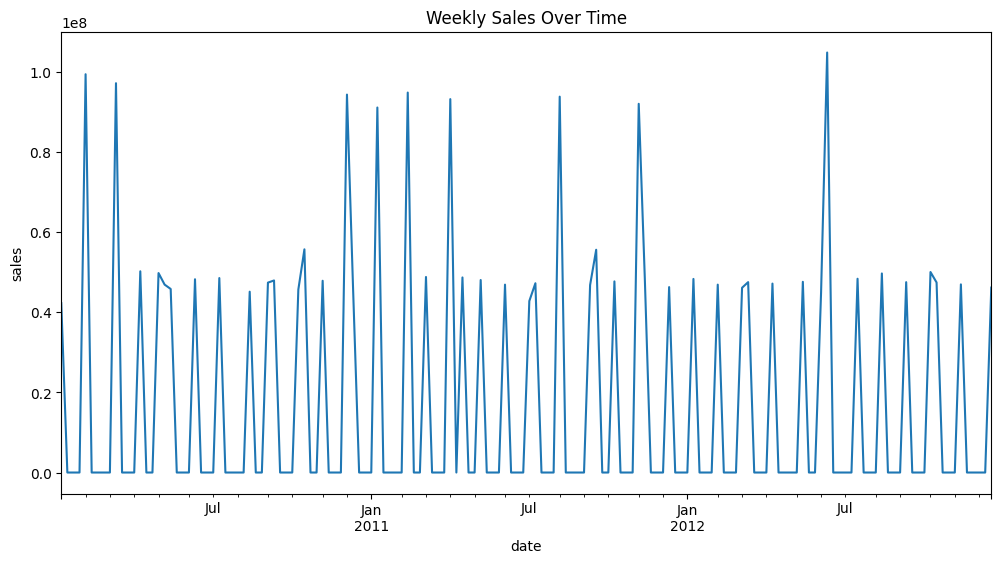

In [29]:
df.set_index('date').resample('W')['weekly_sales'].sum().plot(figsize=(12,6), title='Weekly Sales Over Time')
plt.ylabel('sales'); plt.show()


C:\Users\saisa\AppData\Local\Temp\ipykernel_13200\1722412863.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M', on='date')['weekly_sales'].sum().plot(title="Monthly Sales Trend", figsize=(12,6))


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='date'>

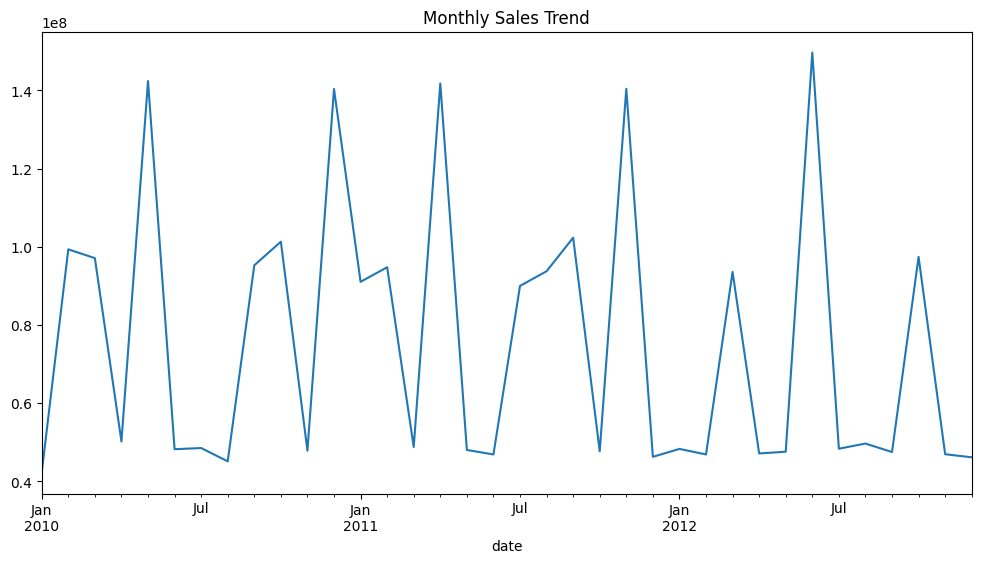

In [30]:
df.resample('M', on='date')['weekly_sales'].sum().plot(title="Monthly Sales Trend", figsize=(12,6))


Text(0.5, 1.0, 'Sales Distribution: Holiday vs Non-Holiday')

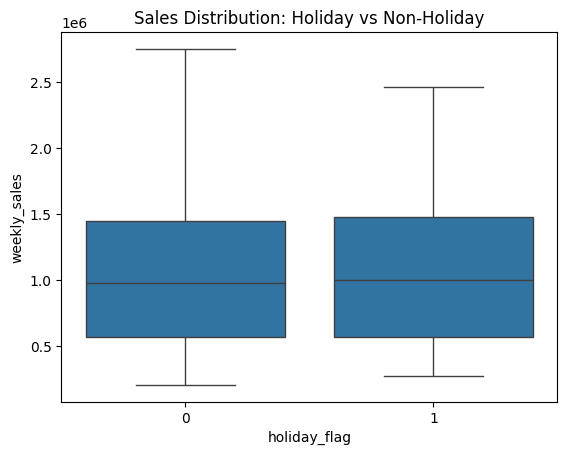

In [31]:
sns.boxplot(x='holiday_flag', y='weekly_sales', data=df)
plt.title("Sales Distribution: Holiday vs Non-Holiday")


<Axes: title={'center': 'Top 10 Stores by Sales'}, xlabel='store_name'>

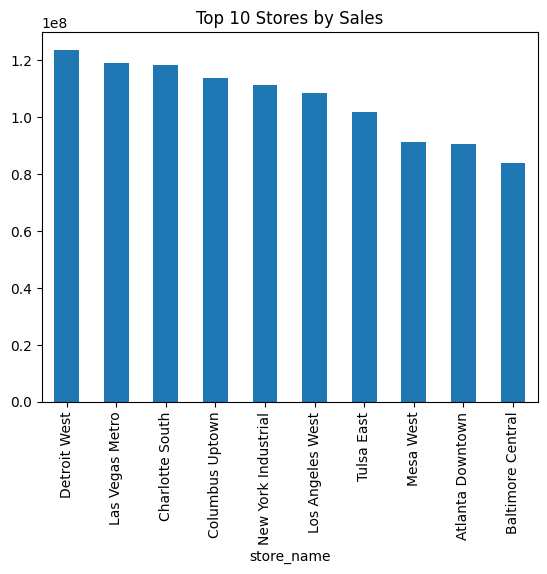

In [32]:
# Top 10 performing stores
df.groupby('store_name')['weekly_sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Stores by Sales')


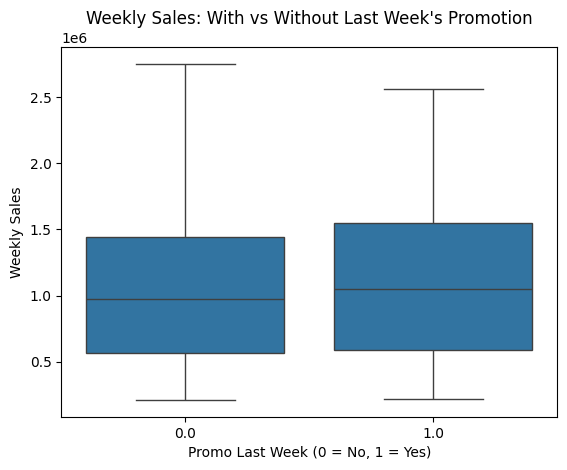

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example using 'promo_last_week'
sns.boxplot(x='promo_last_week', y='weekly_sales', data=df)
plt.title("Weekly Sales: With vs Without Last Week's Promotion")
plt.xlabel("Promo Last Week (0 = No, 1 = Yes)")
plt.ylabel("Weekly Sales")
plt.show()


Text(0.5, 1.0, 'Feature Correlation Heatmap')

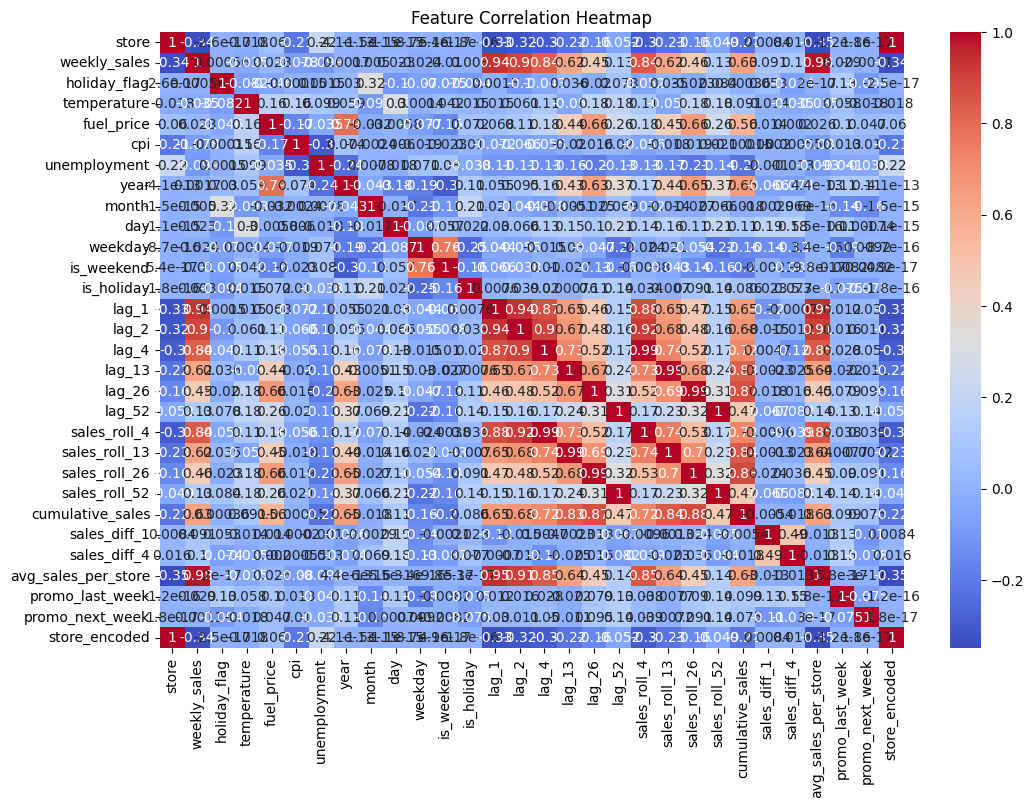

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")


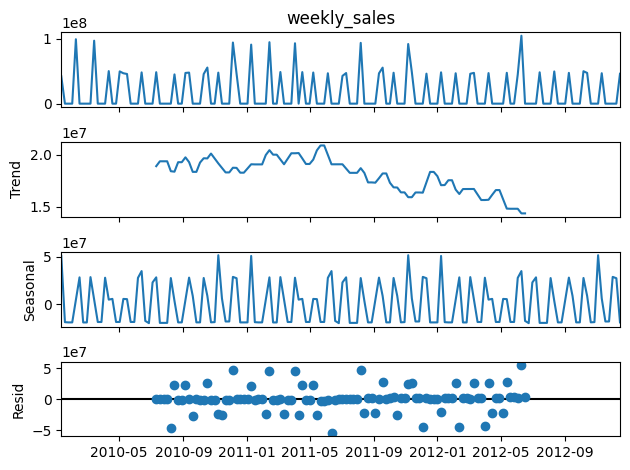

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df.set_index('date')['weekly_sales'].resample('W').sum(), model='additive')
decomp.plot(); plt.show()


# Reactive EDA

In [36]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("C:/Users/sajja/Downloads/Walmart_Sales/data/Processed/feature_engineered_sales.csv", parse_dates=['date'])
df = df.sort_values('date')

# Weekly trend
weekly = df.set_index('date').resample('W')['weekly_sales'].sum().reset_index()
fig_weekly = px.line(weekly, x='date', y='weekly_sales', title="Weekly Sales Trend")
fig_weekly.show()

# Monthly trend
monthly = df.set_index('date').resample('M')['weekly_sales'].sum().reset_index()
fig_monthly = px.line(monthly, x='date', y='weekly_sales', title="Monthly Sales Trend")
fig_monthly.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/sajja/Downloads/Walmart_Sales/data/Processed/feature_engineered_sales.csv'

In [37]:
# Top 10 stores
top_stores = df.groupby('store_name')['weekly_sales'].sum().sort_values(ascending=False).head(10).reset_index()
fig_store = px.bar(top_stores, x='store_name', y='weekly_sales', title="Top 10 Stores by Total Sales")
fig_store.show()




In [38]:
import plotly.figure_factory as ff

corr = df.select_dtypes(include='number').corr()
fig_corr = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    colorscale='Viridis'
)
fig_corr.update_layout(title="Correlation Heatmap")
fig_corr.show()


In [39]:
fig_box = px.box(df, x='store_name', y='weekly_sales', title="Weekly Sales by Store")
fig_box.update_layout(xaxis_tickangle=-45)
fig_box.show()


In [84]:
from scipy.stats import zscore

# Z-score method
df['z_score'] = zscore(df['weekly_sales'])
outliers_z = df[df['z_score'].abs() > 3]

# IQR method
Q1 = df['weekly_sales'].quantile(0.25)
Q3 = df['weekly_sales'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['weekly_sales'] < Q1 - 1.5 * IQR) | (df['weekly_sales'] > Q3 + 1.5 * IQR)]

print(f"Z-score outliers: {len(outliers_z)}, IQR outliers: {len(outliers_iqr)}")


Z-score outliers: 1, IQR outliers: 0


In [86]:
df['is_promotion_week'] = ((df['promo_last_week'] == 1) | (df['promo_next_week'] == 1)).astype(int)


fig_promo = px.box(df, x='is_promotion_week', y='weekly_sales',
                   title="Sales with vs without Promotion")
fig_promo.update_layout(xaxis_title='Promotion Week (0=No, 1=Yes)', yaxis_title='Weekly Sales')
fig_promo.show()


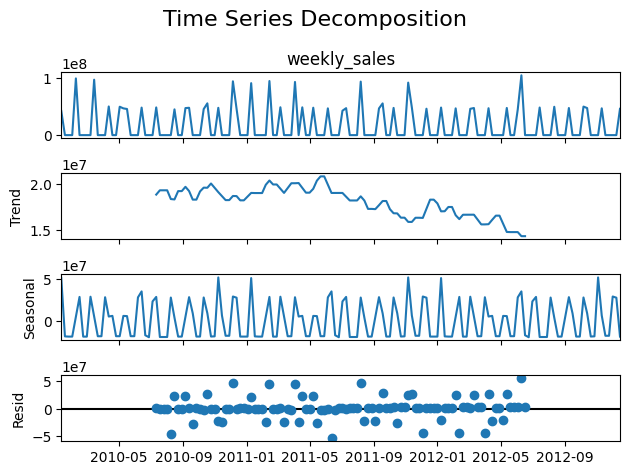

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

ts = df.set_index('date')['weekly_sales'].resample('W').sum()
decomp = seasonal_decompose(ts.dropna(), model='additive')
decomp.plot()
plt.suptitle("Time Series Decomposition", fontsize=16)
plt.tight_layout()
plt.show()


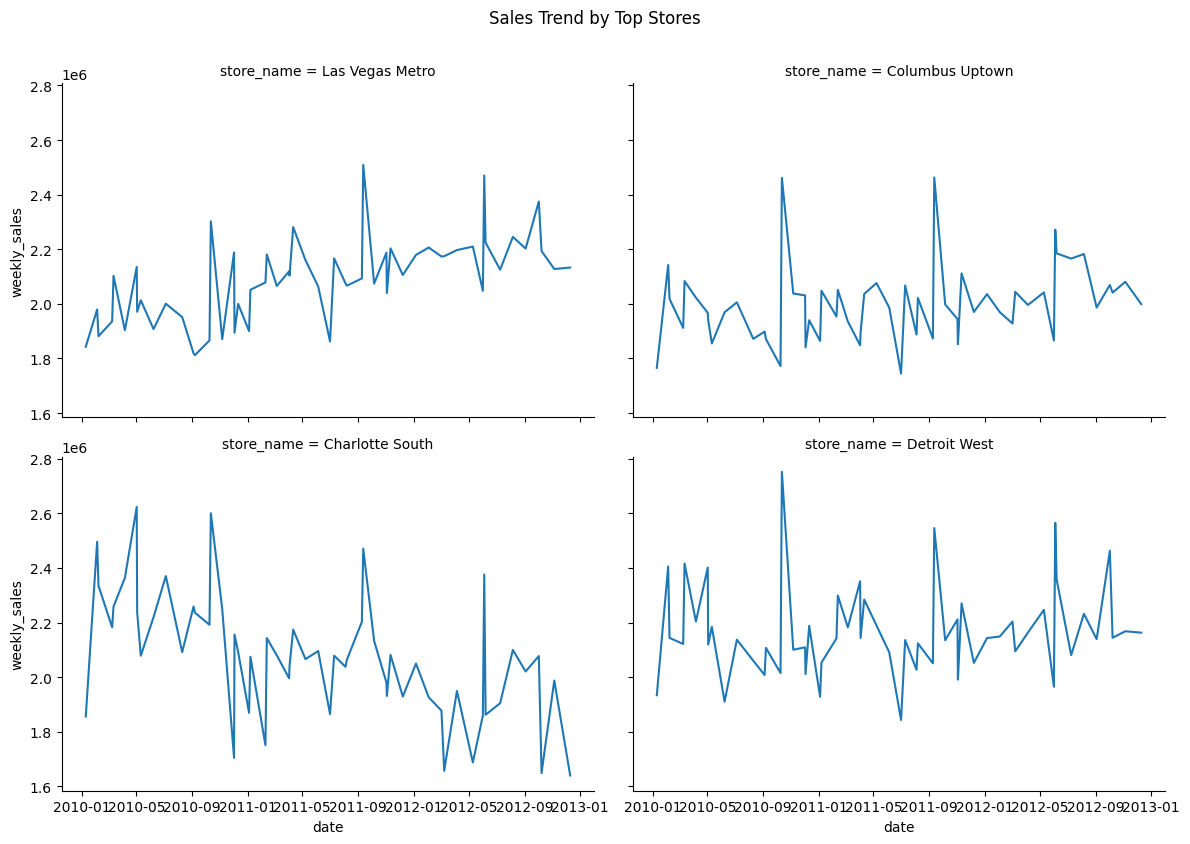

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

top_stores = df.groupby('store_name')['weekly_sales'].sum().sort_values(ascending=False).head(4).index
sample = df[df['store_name'].isin(top_stores)]

g = sns.FacetGrid(sample, col="store_name", col_wrap=2, height=4, aspect=1.5)
g.map_dataframe(sns.lineplot, x="date", y="weekly_sales")
g.fig.suptitle("Sales Trend by Top Stores", y=1.05)
plt.show()


In [59]:
import plotly.graph_objects as go

fig_dist = go.Figure()
fig_dist.add_trace(go.Histogram(x=df['weekly_sales'], nbinsx=50, name='Sales'))
fig_dist.update_layout(
    title=f"Sales Distribution (Skew: {df['weekly_sales'].skew():.2f}, Kurtosis: {df['weekly_sales'].kurtosis():.2f})",
    xaxis_title="Weekly Sales",
    yaxis_title="Frequency"
)
fig_dist.show()

fig_dist.write_html("C:/Users/Saisa/Downloads/Walmart_Sales/outputs/weekly_sales_distribution.html")




In [92]:
print(df.columns.tolist())


['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature', 'fuel_price', 'cpi', 'unemployment', 'year', 'month', 'day', 'weekday', 'is_weekend', 'is_holiday', 'holiday_name', 'store_name', 'lag_1', 'lag_2', 'lag_4', 'lag_13', 'lag_26', 'lag_52', 'sales_roll_4', 'sales_roll_13', 'sales_roll_26', 'sales_roll_52', 'cumulative_sales', 'sales_diff_1', 'sales_diff_4', 'avg_sales_per_store', 'promo_last_week', 'promo_next_week', 'store_encoded', 'z_score', 'is_promotion_week']


# Interactive Dashboard

In [60]:
import os

output_folder = "C:/Users/Saisa/Downloads/Walmart_Sales/outputs"
os.makedirs(output_folder, exist_ok=True)


In [61]:
import plotly.express as px
import plotly.graph_objects as go

# Weekly sales trend
weekly = df.set_index('date').resample('W')['weekly_sales'].sum().reset_index()
fig_weekly = px.line(weekly, x='date', y='weekly_sales', title="📈 Weekly Sales Trend")
fig_weekly.write_html(f"{output_folder}/weekly_sales_trend.html")

# Monthly sales trend
monthly = df.set_index('date').resample('M')['weekly_sales'].sum().reset_index()
fig_monthly = px.line(monthly, x='date', y='weekly_sales', title="📈 Monthly Sales Trend")
fig_monthly.write_html(f"{output_folder}/monthly_sales_trend.html")

# Sales distribution
fig_dist = go.Figure()
fig_dist.add_trace(go.Histogram(x=df['weekly_sales'], nbinsx=50))
fig_dist.update_layout(
    title=f"Sales Distribution (Skew: {df['weekly_sales'].skew():.2f}, Kurtosis: {df['weekly_sales'].kurtosis():.2f})",
    xaxis_title="Weekly Sales",
    yaxis_title="Frequency"
)
fig_dist.write_html(f"{output_folder}/sales_distribution.html")

# Sales by promotion week
if 'is_promotion_week' not in df.columns:
    df['is_promotion_week'] = ((df['promo_last_week'] == 1) | (df['promo_next_week'] == 1)).astype(int)

fig_promo = px.box(df, x='is_promotion_week', y='weekly_sales',
                   title="📦 Sales with vs without Promotion")
fig_promo.write_html(f"{output_folder}/sales_vs_promotion.html")

# Sales by store (top 5 only)
top_stores = df.groupby('store')['weekly_sales'].sum().nlargest(5).index
df_top_stores = df[df['store'].isin(top_stores)]
fig_store = px.box(df_top_stores, x='store', y='weekly_sales', title="🏬 Weekly Sales by Top 5 Stores")
fig_store.write_html(f"{output_folder}/top5_store_sales_boxplot.html")


ModuleNotFoundError: No module named 'plotly.validators.scatter._marker'